# Logistic Regression -- Revised

In [1]:
import numpy as np
from sklearn import linear_model, model_selection, metrics
import matplotlib.pyplot as plt

data = np.loadtxt('exam_score.csv', delimiter = ',')
x = data[:,:2]
y = data[:,2].astype(int)

logit = linear_model.LogisticRegression()
logit.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

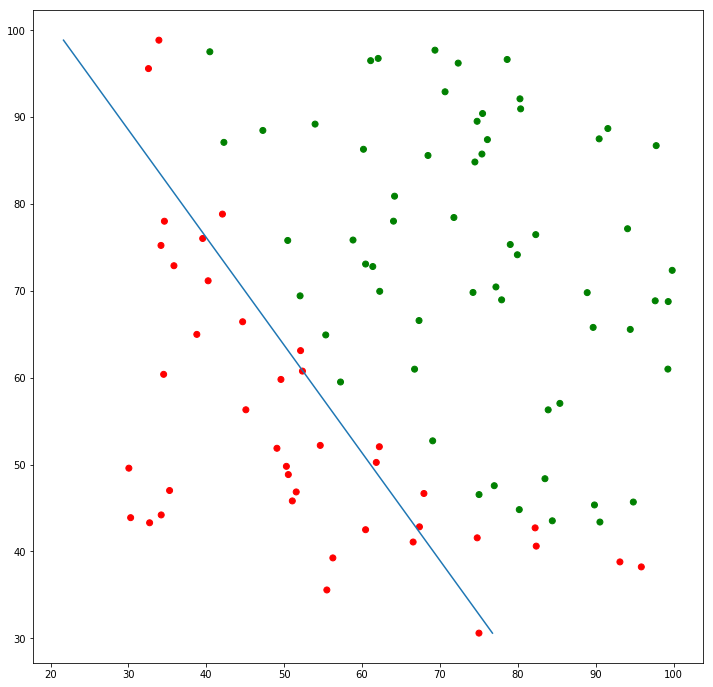

In [2]:
color = ['red', 'green']
y_color = [color[i] for i in y]

plt.figure(figsize=(12, 12))
plt.scatter(x[:,0], x[:,1], c=y_color)
plt.plot((- logit.coef_[0][1] * np.array((min(x[:,1]), max(x[:,1]))) - logit.intercept_[0]) / logit.coef_[0][0], np.array((min(x[:,1]), max(x[:,1]))))
plt.show()

accuracy for training data at C=1.000000 is 0.800000
accuracy for test data at C=1.000000 is 0.760000
model complexity: 0.034791114281377766
accuracy for training data at C=2.000000 is 0.840000
accuracy for test data at C=2.000000 is 0.860000
model complexity: 0.0489814849192567
accuracy for training data at C=5.000000 is 0.900000
accuracy for test data at C=5.000000 is 0.940000
model complexity: 0.07403645731502027
accuracy for training data at C=10.000000 is 0.900000
accuracy for test data at C=10.000000 is 0.920000
model complexity: 0.09731969039745683


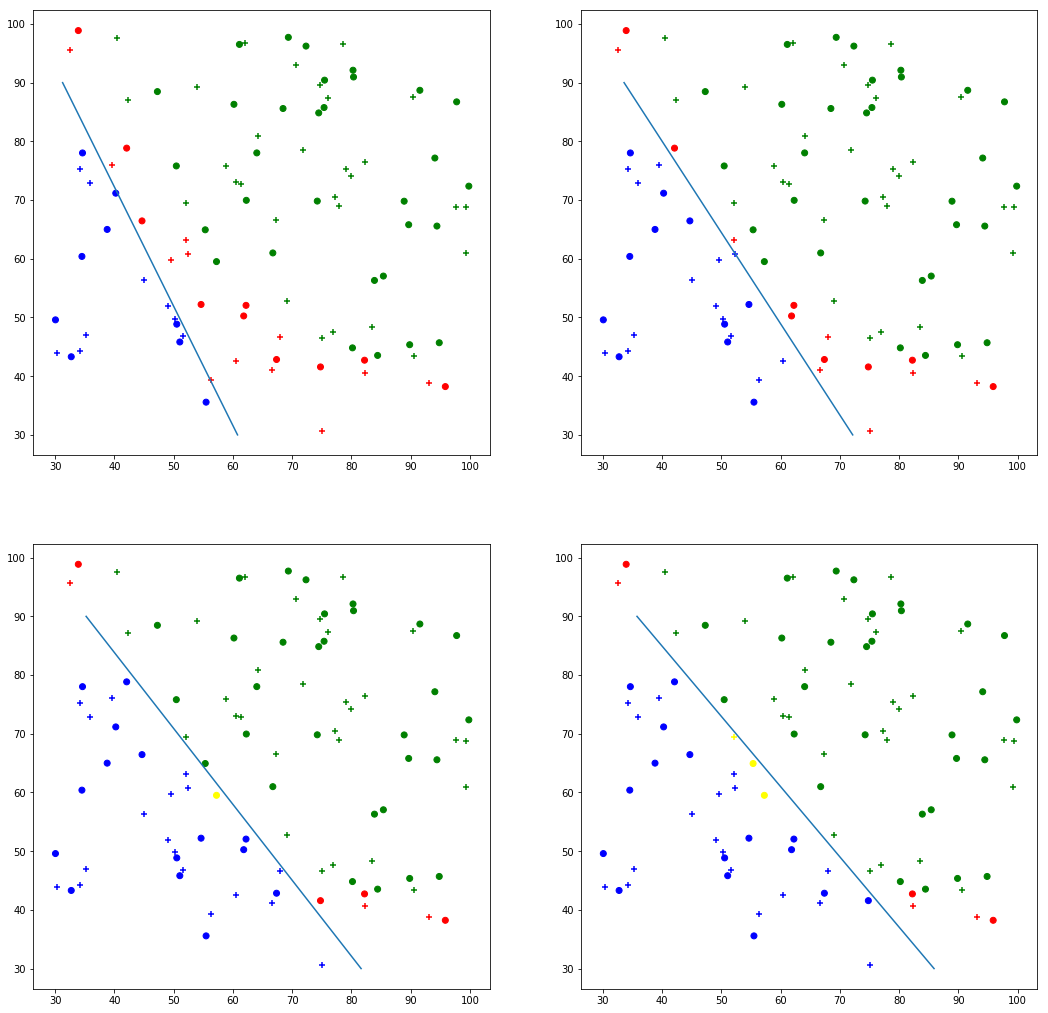

In [3]:
x_train, x_test, y_train, y_test = model_selection.train_test_split (data[:,:2], data[:,2].astype(int), test_size = 0.5, random_state = 2018)

plt.figure(figsize = (18,18))
C = [1, 2, 5, 10]
for i in range(4):
    plt.subplot(2, 2, i+1)
    logit = linear_model.LogisticRegression(C=C[i])
    logit.fit(x_train, y_train)
    y_train_pred = logit.predict(x_train)
    y_test_pred = logit.predict(x_test)
    color = [['blue', 'red'], ['yellow', 'green']]
    print('accuracy for training data at C=%f is %f' % (C[i], metrics.accuracy_score(y_train, y_train_pred)))
    print('accuracy for test data at C=%f is %f' % (C[i], metrics.accuracy_score(y_test, y_test_pred)))
    print('model complexity:', np.sqrt(np.square(logit.coef_[0][0]) + np.square(logit.coef_[0][1])))
    plt.scatter(x_train[:,0], x_train[:,1], c=[color[j1][j2] for j1, j2 in zip(y_train, y_train_pred)], marker='o')
    plt.scatter(x_test[:,0], x_test[:,1], c=[color[j1][j2] for j1, j2 in zip(y_test, y_test_pred)], marker='+')
    plt.plot((- logit.coef_[0][1] * np.array((30,90)) - logit.intercept_[0]) / logit.coef_[0][0], np.array((30,90)))

plt.show()

In [4]:
import pandas as pd
import pandas_datareader as pdr

msft = pdr.DataReader('MSFT', 'iex', start = '2017-05-01', end = '2018-04-30')
msft = msft.rename(index = {i: pd.datetime(int(i[:4]), int(i[5:7]), int(i[8:10])) for i in msft.index.values.tolist()})

diff = msft.diff(1)['close']
x = np.column_stack((diff.shift(1), diff.shift(2)))[3:]
y = np.array(diff[3:] >= 0.1).astype(int)

2y


Predict days with price difference at least 0.1 given two previous differences

In [5]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 2018)

logit = linear_model.LogisticRegression()
logit.fit(x_train, y_train)
print('accuracy for training data:', logit.score(x_train, y_train))
print('accuracy for test data:', logit.score(x_test, y_test))
y_pred = logit.predict(x_test)
print("precision:", metrics.precision_score(y_test, y_pred))
print("recall:", metrics.recall_score(y_test, y_pred))
print("accuracy:", metrics.accuracy_score(y_test, y_pred))
print("f1 score:", metrics.f1_score(y_test, y_pred))
print("confusion matrix:\n", metrics.confusion_matrix(y_test, y_pred))

accuracy for training data: 0.5678391959798995
accuracy for test data: 0.6
precision: 0.6111111111111112
recall: 0.4583333333333333
accuracy: 0.6
f1 score: 0.5238095238095238
confusion matrix:
 [[19  7]
 [13 11]]


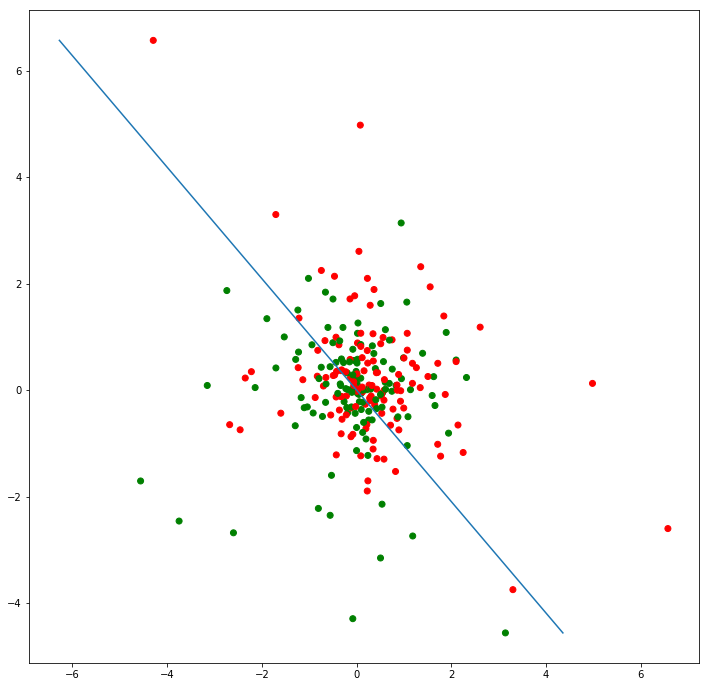

In [6]:
import matplotlib.pyplot as plt

color = ['red', 'green']
y_color = [color[i] for i in y]

plt.figure(figsize=(12, 12))
plt.scatter(x[:,0], x[:,1], c=y_color)
plt.plot((- logit.coef_[0][1] * np.array((min(x[:,1]), max(x[:,1]))) - logit.intercept_[0]) / logit.coef_[0][0], np.array((min(x[:,1]), max(x[:,1]))))
plt.show()

# Logistic Regression with regularization

In [7]:
x = np.column_stack((msft.shift(1)['close'],
                      msft.shift(2)['close'],
                      msft.shift(3)['close'],
                      msft.shift(4)['close'],
                      msft.shift(5)['close'],
                      msft.shift(1)['volume'],
                      msft.shift(2)['volume'],
                      msft.shift(3)['volume'],
                      msft.shift(4)['volume'],
                      msft.shift(5)['volume'],
                      diff.shift(1),
                      diff.shift(2),
                      diff.shift(3),
                      diff.shift(4),
                      diff.shift(5)))[6:]
y = np.array(diff[6:] >= 0.05).astype(int)

In [8]:
from sklearn import preprocessing, model_selection

scaler = preprocessing.StandardScaler()
x_normalized = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = model_selection.train_test_split(x_normalized, y, test_size = 0.2, random_state = 2018)

In [9]:
for C in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    print('-' * 24)
    print('at C = ', C)
    print('-' * 24)
    logit = linear_model.LogisticRegression(C = C)
    logit.fit(x_train, y_train)
    print('accuracy for training data:', logit.score(x_train, y_train))
    print('accuracy for test data:', logit.score(x_test, y_test))
    y_pred = logit.predict(x_test)
    print("precision:", metrics.precision_score(y_test, y_pred))
    print("recall:", metrics.recall_score(y_test, y_pred))
    print("accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("f1 score:", metrics.f1_score(y_test, y_pred))
    print("confusion matrix:\n", metrics.confusion_matrix(y_test, y_pred))

------------------------
at C =  0.001
------------------------
accuracy for training data: 0.5561224489795918
accuracy for test data: 0.48
precision: 0.65
recall: 0.40625
accuracy: 0.48
f1 score: 0.5000000000000001
confusion matrix:
 [[11  7]
 [19 13]]
------------------------
at C =  0.01
------------------------
accuracy for training data: 0.5612244897959183
accuracy for test data: 0.52
precision: 0.7
recall: 0.4375
accuracy: 0.52
f1 score: 0.5384615384615384
confusion matrix:
 [[12  6]
 [18 14]]
------------------------
at C =  0.1
------------------------
accuracy for training data: 0.5867346938775511
accuracy for test data: 0.54
precision: 0.7142857142857143
recall: 0.46875
accuracy: 0.54
f1 score: 0.5660377358490566
confusion matrix:
 [[12  6]
 [17 15]]
------------------------
at C =  1
------------------------
accuracy for training data: 0.6326530612244898
accuracy for test data: 0.5
precision: 0.6842105263157895
recall: 0.40625
accuracy: 0.5
f1 score: 0.5098039215686275
confu

# SVM binary classification

In [10]:
from sklearn import datasets, svm

def my_linspace (min_value, max_value, steps):
    diff = max_value - min_value
    return np.linspace (min_value - 0.1 * diff, max_value + 0.1 * diff, steps)

def my_line (x_min, x_max, y_min, y_max, w, b):
    if w[0] == 0.0:
        if w[1] == 0.0:
            print('impossible line')
            return [0.0, 0.0], [0.0, 0.0]
        else:
            return [x_min, x_max], [- b / w[1], - b / w[1]]
    elif w[1] == 0.0:
            return [- b / w[0], - b / w[0]], [y_min, y_max]
    else:
        xn = - (w[1] * np.asarray([y_min, y_max]) + b)  / w[0]
        x_min, x_max = max(x_min, min(xn)), min(x_max, max(xn))
        return [x_min, x_max], [- (w[0] * x_min + b) / w[1], - (w[0] * x_max + b) / w[1]]

In [11]:
iris = datasets.load_iris()
x = iris.data[:100,:2]
y = iris.target[:100]

clf = []
for C in [1, 10, 100, 1000]:
    clf.append(svm.SVC(kernel='linear', C=C))

for i in range(4):
    clf[i].fit(x, y)

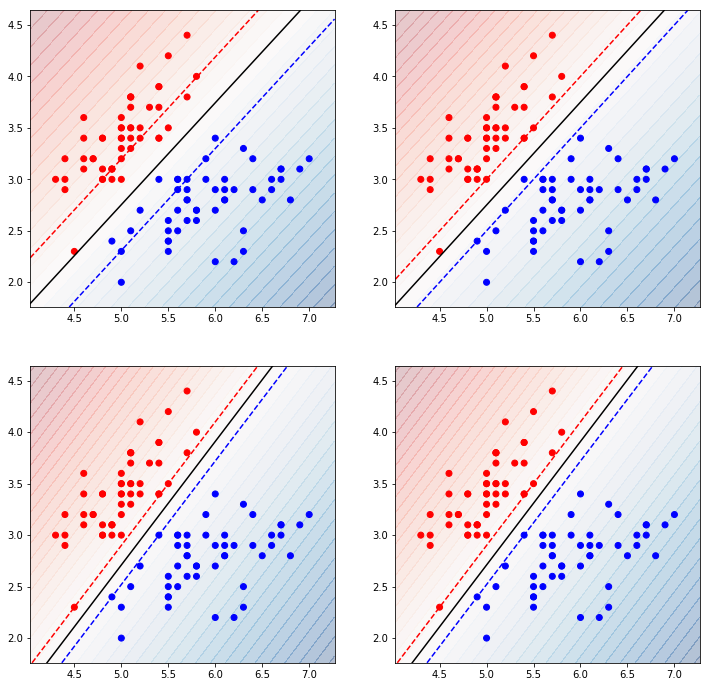

In [12]:
steps = 200
x0 = my_linspace(min(x[:,0]), max(x[:,0]), steps)
x1 = my_linspace(min(x[:,1]), max(x[:,1]), steps)
xx0, xx1 = np.meshgrid(x0, x1)
mesh_data = np.c_[xx0.ravel(), xx1.ravel()]
mesh_deci = [0] * 4
for i in range(4):
    mesh_deci[i] = clf[i].decision_function(mesh_data).reshape(steps, steps)

# assert mesh_deci can be calculated from w and b:
# clf[i].decision_function(mesh_data)
# ==
# np.dot(mesh_data, np.transpose(clf[i].coef_)) + clf[i].intercept_

color = ['red', 'blue']
y_color = [color[i] for i in y]

plt.figure(figsize = (12, 12))
contour_color = [plt.cm.Reds, plt.cm.Blues]

for i in range(4):
    plt.subplot(2, 2, i+1)
    div = my_line(x0[0], x0[-1], x1[0], x1[-1], clf[i].coef_[0], clf[i].intercept_[0])
    pos = my_line(x0[0], x0[-1], x1[0], x1[-1], clf[i].coef_[0], clf[i].intercept_[0] - 1)
    neg = my_line(x0[0], x0[-1], x1[0], x1[-1], clf[i].coef_[0], clf[i].intercept_[0] + 1)
    plt.plot(div[0], div[1], color='black')
    plt.plot(pos[0], pos[1], color='blue', ls='--')
    plt.plot(neg[0], neg[1], color='red', ls='--')
    plt.contourf(xx0, xx1, np.maximum(-mesh_deci[i], 0.0), 20, cmap=contour_color[0], alpha=0.3)
    plt.contourf(xx0, xx1, np.maximum(mesh_deci[i], 0.0), 20, cmap=contour_color[1], alpha=0.3)
    # plt.contourf(xx0, xx1, mesh_deci[i], 40, cmap=plt.cm.RdBu, alpha=0.3)
    plt.scatter(x[:,0], x[:,1], c=y_color)

plt.show()

# SVM binary classification with kernels

In [13]:
clf = []
for kern in ['linear', 'poly', 'rbf']:
    clf.append(svm.SVC(kernel=kern, gamma='auto'))

for kern in ['linear', 'poly', 'rbf']:
    clf.append(svm.SVC(kernel=kern, gamma=1))

for i in range(6):
    clf[i].fit(x, y)

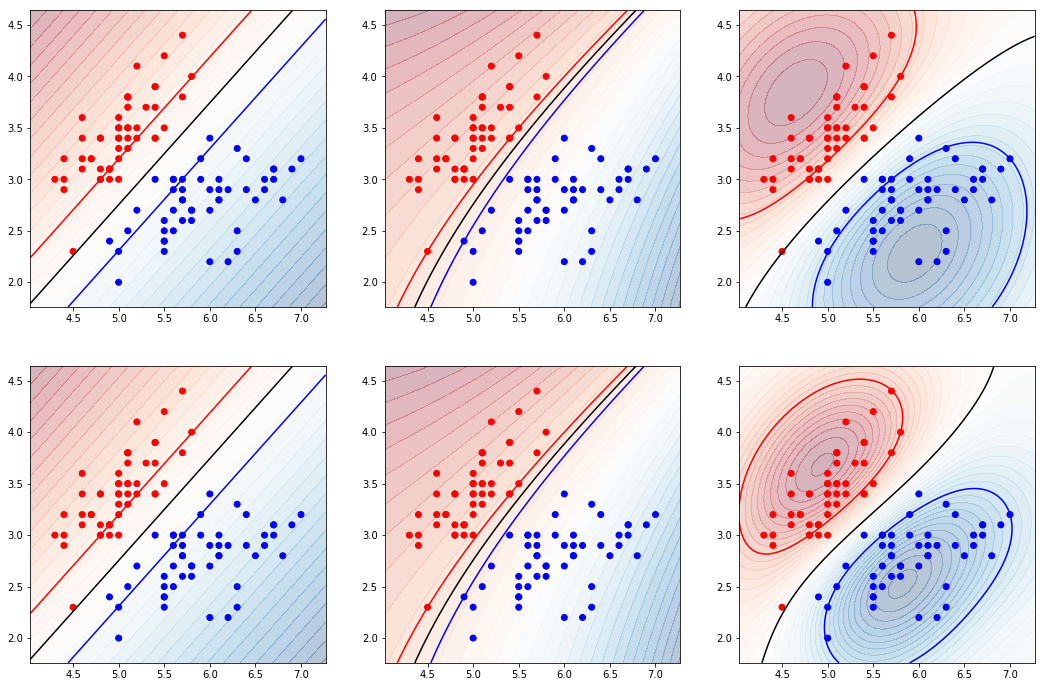

In [14]:
steps = 200
x0 = my_linspace(min(x[:,0]), max(x[:,0]), steps)
x1 = my_linspace(min(x[:,1]), max(x[:,1]), steps)
xx0, xx1 = np.meshgrid(x0, x1)
mesh_data = np.c_[xx0.ravel(), xx1.ravel()]
mesh_deci = [0] * 6
for i in range(6):
    mesh_deci[i] = clf[i].decision_function(mesh_data).reshape(steps, steps)

color = ['red', 'blue']
y_color = [color[i] for i in y]

plt.figure(figsize = (18, 12))

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.contourf(xx0, xx1, mesh_deci[i], 40, cmap=plt.cm.RdBu, alpha=0.3)
    plt.contour(xx0, xx1, mesh_deci[i], levels=[-1.0,0.0,1.0], colors=['red','black','blue'])
    plt.scatter(x[:,0], x[:,1], c=y_color)

plt.show()

# SVM on non-linear data

In [15]:
data = np.loadtxt('nonlinear.txt', delimiter = ',')
x = data[:,:2]
y = data[:,2].astype(int)

clf = []
for kernel in ['poly', 'rbf']:
    for gamma in [1, 10]:
        clf.append(svm.SVC(kernel=kernel, gamma=gamma))

for i in range(4):
    clf[i].fit(x, y)

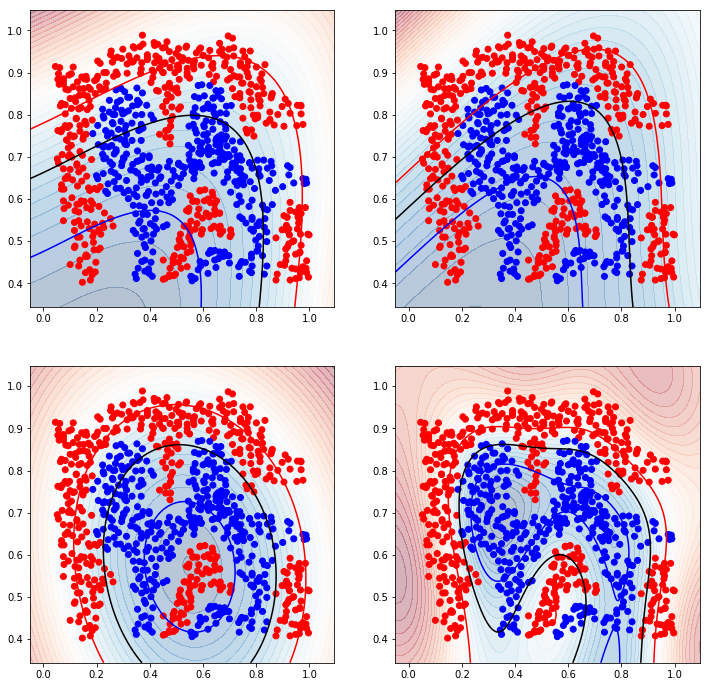

In [16]:
color = ['blue', 'red']
y_color = [color[i] for i in y]
plt.figure(figsize = (12, 12))
steps = 200
x0 = my_linspace(min(x[:,0]), max(x[:,0]), steps)
x1 = my_linspace(min(x[:,1]), max(x[:,1]), steps)
xx0, xx1 = np.meshgrid(x0, x1)
mesh_data = np.c_[xx0.ravel(), xx1.ravel()]

for i in range(4):
    plt.subplot(2, 2, i+1)
    mesh_deci = clf[i].decision_function(mesh_data).reshape(steps, steps)
    plt.contourf(xx0, xx1, -mesh_deci, 40, cmap=plt.cm.RdBu, alpha=0.3)
    plt.contour(xx0, xx1, mesh_deci, levels=[-1.0,0.0,1.0], colors=['blue','black','red'])
    plt.scatter(x[:,0], x[:,1], c=y_color)

plt.show()

# SVM on stock momentum

In [17]:
x = np.column_stack((diff.shift(1), diff.shift(2)))[3:]
y = np.array(diff[3:] >= 0.1).astype(int)

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 2018)

clf = []
for kernel in ['poly', 'rbf']:
    for gamma in [1, 10]:
        clf.append(svm.SVC(kernel=kernel, gamma=gamma))

for i in range(4):
    clf[i].fit(x_train, y_train)
    print('accuracy for training data:', clf[i].score(x_train, y_train))
    print('accuracy for test data:', clf[i].score(x_test, y_test))
    y_pred = clf[i].predict(x_test)
    print("precision:", metrics.precision_score(y_test, y_pred))
    print("recall:", metrics.recall_score(y_test, y_pred))
    print("accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("f1 score:", metrics.f1_score(y_test, y_pred))
    print("confusion matrix:\n", metrics.confusion_matrix(y_test, y_pred))

accuracy for training data: 0.5577889447236181
accuracy for test data: 0.54
precision: 0.6666666666666666
recall: 0.08333333333333333
accuracy: 0.54
f1 score: 0.14814814814814814
confusion matrix:
 [[25  1]
 [22  2]]
accuracy for training data: 0.5527638190954773
accuracy for test data: 0.54
precision: 0.6666666666666666
recall: 0.08333333333333333
accuracy: 0.54
f1 score: 0.14814814814814814
confusion matrix:
 [[25  1]
 [22  2]]
accuracy for training data: 0.6432160804020101
accuracy for test data: 0.52
precision: 0.5
recall: 0.4166666666666667
accuracy: 0.52
f1 score: 0.45454545454545453
confusion matrix:
 [[16 10]
 [14 10]]
accuracy for training data: 0.7738693467336684
accuracy for test data: 0.6
precision: 0.6
recall: 0.5
accuracy: 0.6
f1 score: 0.5454545454545454
confusion matrix:
 [[18  8]
 [12 12]]


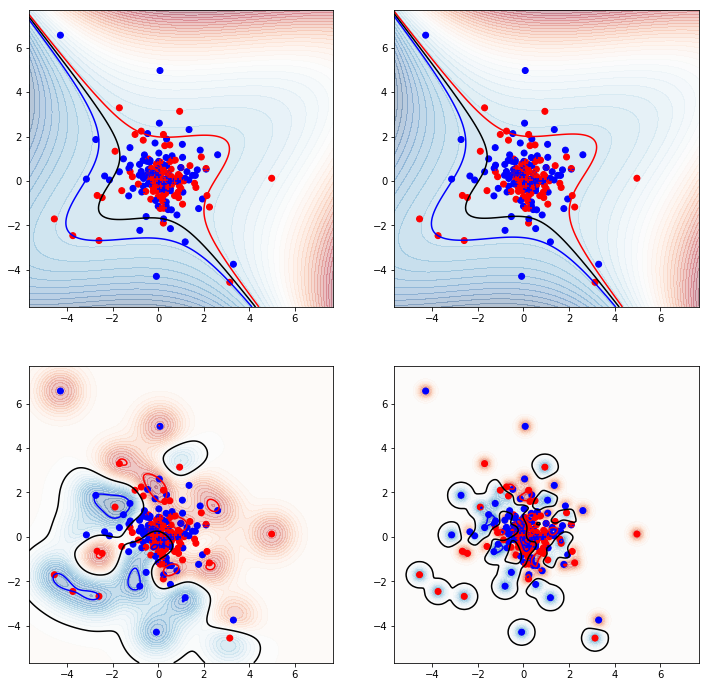

In [18]:
color = ['red', 'blue']
y_color = [color[i] for i in y]
plt.figure(figsize = (12, 12))
steps = 200
x0 = my_linspace(min(x[:,0]), max(x[:,0]), steps)
x1 = my_linspace(min(x[:,1]), max(x[:,1]), steps)
xx0, xx1 = np.meshgrid(x0, x1)
mesh_data = np.c_[xx0.ravel(), xx1.ravel()]

for i in range(4):
    plt.subplot(2, 2, i+1)
    mesh_deci = clf[i].decision_function(mesh_data).reshape(steps, steps)
    plt.contourf(xx0, xx1, mesh_deci, 40, cmap=plt.cm.RdBu, alpha=0.3)
    plt.contour(xx0, xx1, mesh_deci, levels=[-1.0,0.0,1.0], colors=['red','black','blue'])
    plt.scatter(x_train[:,0], x_train[:,1], c=y_color)
    plt.scatter(x_train[:,0], x_train[:,1], c=y_color, marker='+')

plt.show()

# SVM multiclass classification with kernels

In [19]:
def my_mask (value, selected):
    min_value = 1.7e+308
    for i in range(len(value)):
        if selected[i] and value[i] < min_value:
            min_value = value[i]
    for i in range(len(value)):
        if not selected[i]:
            value[i] = min_value
    return value

In [20]:
iris = datasets.load_iris()
x = iris.data[:,:2]
y = iris.target
x = np.append(x, iris.data[:50,:2] + [1.0, 1.0], 0)
y = np.append(y, [3] * 50, 0)

clf = [svm.SVC(kernel='linear', probability=True, decision_function_shape = 'ovo'),
       svm.SVC(kernel='poly', probability=True, decision_function_shape = 'ovo'),
       svm.SVC(probability=True, decision_function_shape = 'ovo')]
for i in range(3):
    clf[i].fit(x, y)

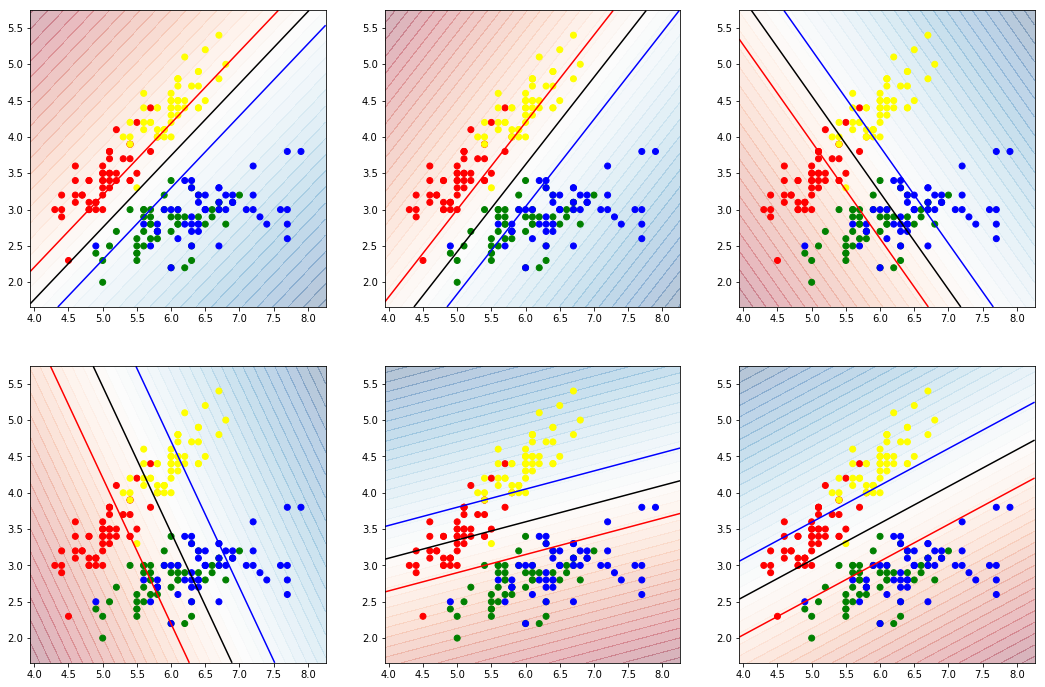

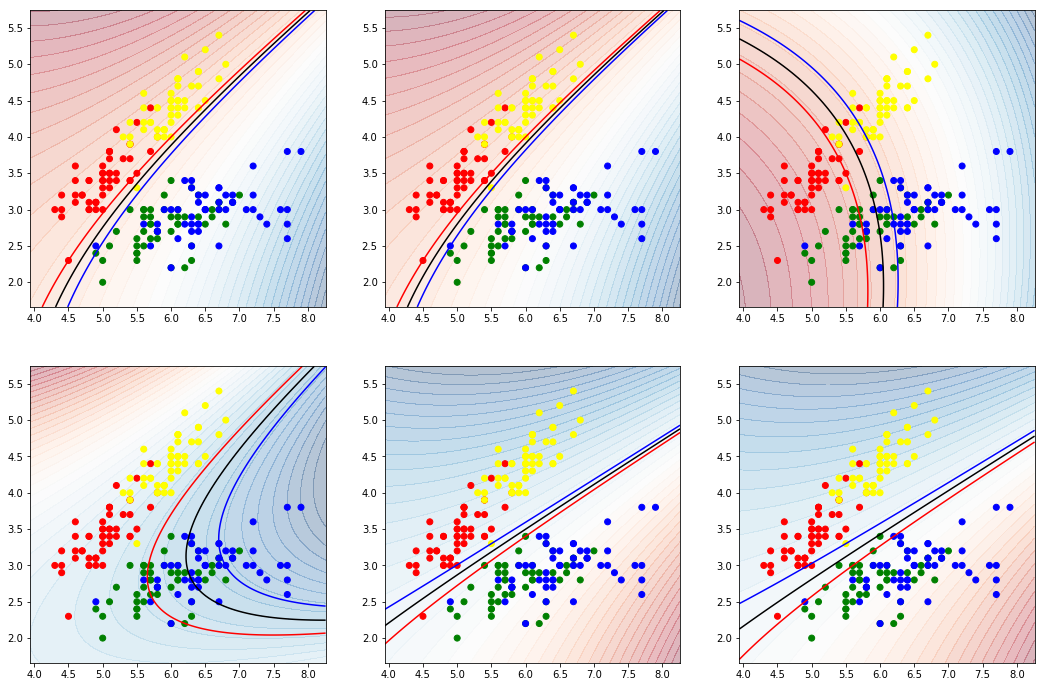

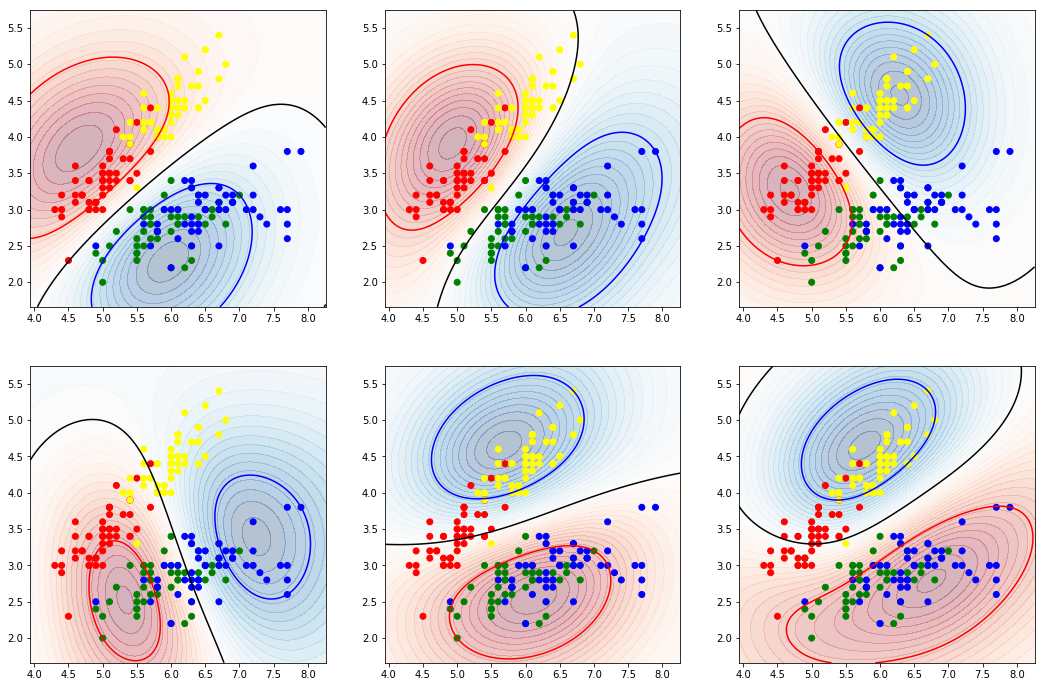

In [21]:
steps = 200
x0 = my_linspace(min(x[:,0]), max(x[:,0]), steps)
x1 = my_linspace(min(x[:,1]), max(x[:,1]), steps)
xx0, xx1 = np.meshgrid(x0, x1)
mesh_data = np.c_[xx0.ravel(), xx1.ravel()]
mesh_deci = [0] * 3
mesh_prob = [0] * 3
n_class = 4
n_ovo = n_class * (n_class - 1) // 2

color = ['red', 'green', 'blue', 'yellow']
y_color = [color[i] for i in y]

for i in range(3):
    plt.figure(figsize = (18, 12))
    pred = clf[i].predict(mesh_data)
    deci = clf[i].decision_function(mesh_data)
    prob = clf[i].predict_proba(mesh_data)
    mesh_deci[i] = np.zeros((steps * steps, n_class))
    j = 0
    for k in range(n_class):
        for l in range(k+1, n_class):
            mesh_deci[i][:,k] += deci[:,j]
            mesh_deci[i][:,l] -= deci[:,j]
            plt.subplot(2, 3, j + 1)
            plt.contourf(xx0, xx1, -deci[:,j].reshape(steps, steps), 40, cmap=plt.cm.RdBu, alpha=0.3)
            plt.contour(xx0, xx1, deci[:,j].reshape(steps, steps), levels=[-1.0,0.0,1.0], colors=['blue','black','red'])
            plt.scatter(x[:,0], x[:,1], c=y_color)
            j += 1
    plt.show()
    for j in range(n_class):
        prob[:,j] = my_mask(prob[:,j], pred == j)
        mesh_deci[i][:,j] = my_mask(mesh_deci[i][:,j], pred == j)
    mesh_deci[i] = mesh_deci[i].reshape(steps, steps, n_class)
    mesh_prob[i] = prob.reshape(steps, steps, n_class)

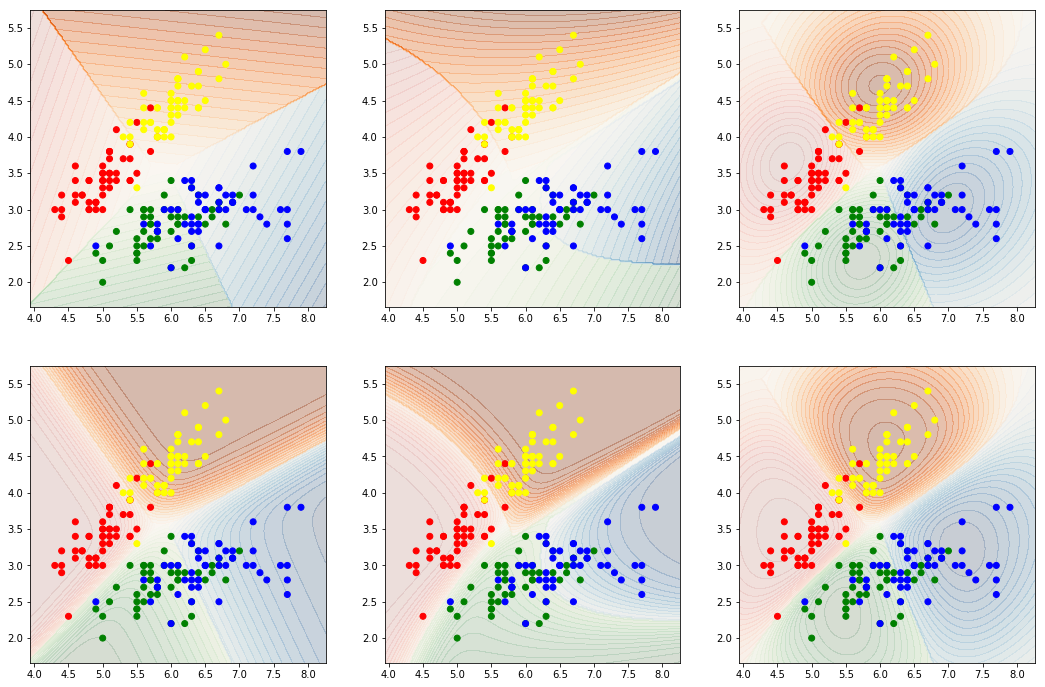

In [22]:
plt.figure(figsize = (18, 12))
contour_color = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues, plt.cm.Oranges]

for i in range(3):
    plt.subplot(2, 3, i+1)
    for j in range(n_class):
        plt.contourf(xx0, xx1, mesh_deci[i][:,:,j], 20, cmap=contour_color[j], alpha=0.3)
    plt.scatter(x[:,0], x[:,1], c=y_color)
    plt.subplot(2, 3, i+4)
    for j in range(n_class):
        plt.contourf(xx0, xx1, mesh_prob[i][:,:,j], 20, cmap=contour_color[j], alpha=0.3)
    plt.scatter(x[:,0], x[:,1], c=y_color)

plt.show()

# Cross Validation

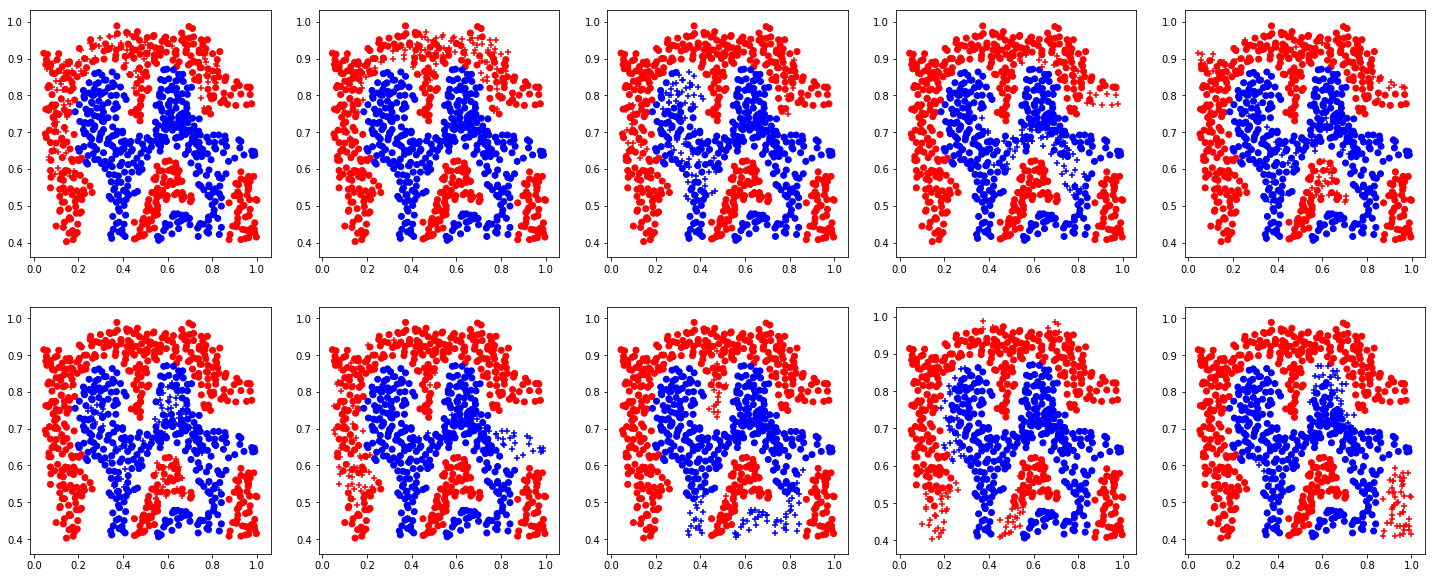

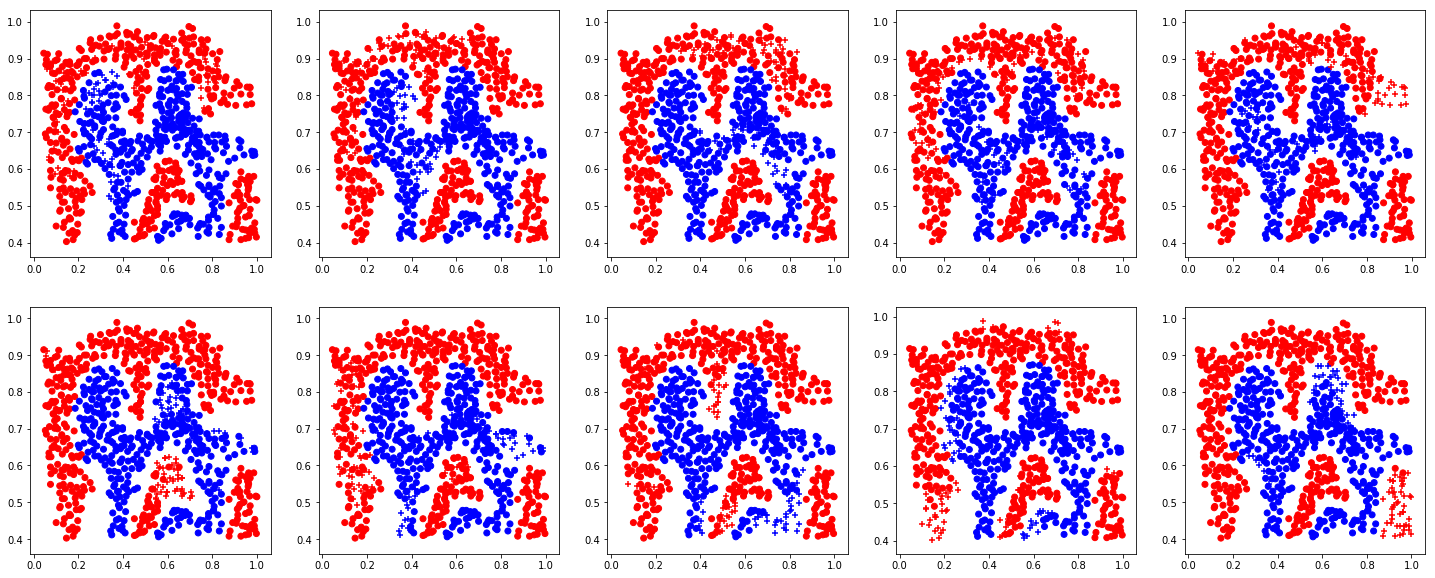

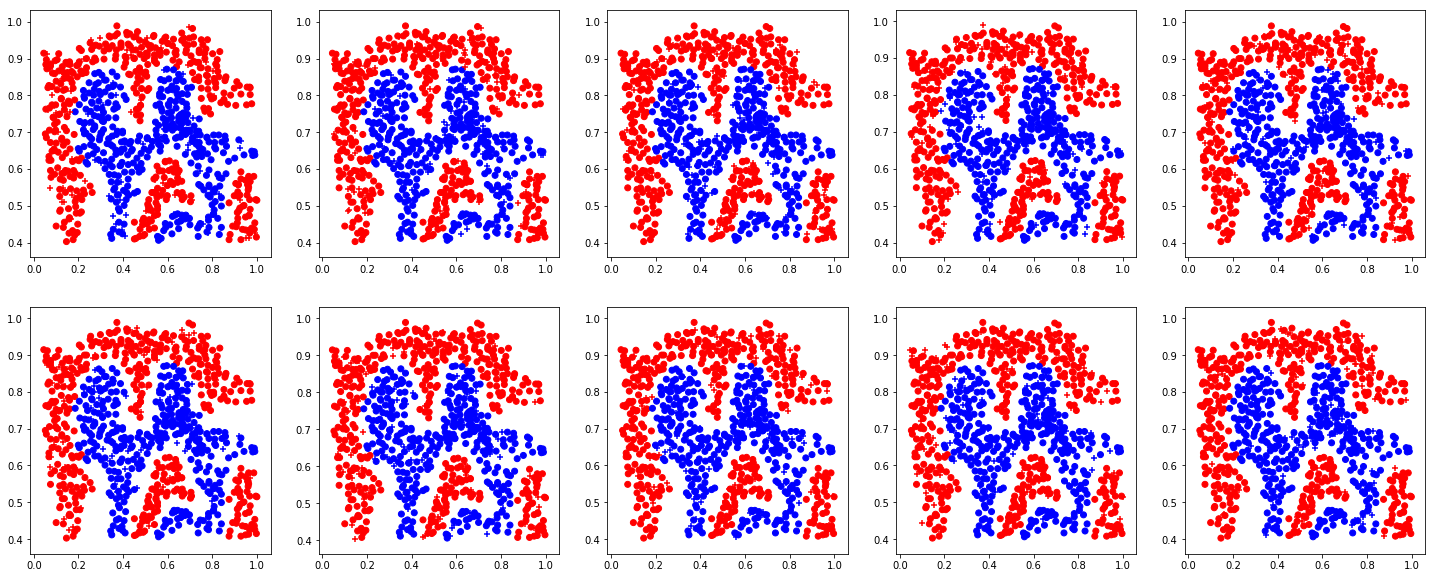

In [23]:
import numpy as np
from sklearn import linear_model, svm, model_selection
import matplotlib.pyplot as plt

data = np.loadtxt('nonlinear.txt', delimiter = ',')
x = data[:,:2]
y = data[:,2].astype(int)

kf  = [
    model_selection.KFold(n_splits = 10),
    model_selection.StratifiedKFold(n_splits = 10),
    model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 2018)]

color = ['blue', 'red']
for i in range(3):
    plt.figure(figsize = (25, 10))
    counter = 1
    for train_index, test_index in kf[i].split(x, y):
        plt.subplot(2, 5, counter)
        counter += 1
        x_train = x[train_index,:]
        x_test = x[test_index,:]
        y_train_color = [color[i] for i in y[train_index]]
        y_test_color = [color[i] for i in y[test_index]]
        plt.scatter(x_train[:,0], x_train[:,1], c = y_train_color)
        plt.scatter(x_test[:,0], x_test[:,1], c = y_test_color, marker = '+')
    
    plt.show()

In [24]:
clf = []
desc = []
for c in [1, 10, 100]:
    clf.append(linear_model.LogisticRegression(C = c))
    desc.append('Logistic Regression with C = ' + str(c))

for c in [1, 10, 100]:
    clf.append(svm.SVC(C = c, probability=True))
    desc.append('SVM with C = ' + str(c))

for i in range(6):
    print('------------------------')
    print(desc[i])
    print('------------------------')
    for j in range(3):
        print('**using ' + (j > 0 and 'Stratified' or '') + 'KFold' + (j == 2 and ' with shuffle' or ''))
        score = model_selection.cross_val_score(clf[i], x, y, cv = kf[j])
        pred = model_selection.cross_val_predict(clf[i], x, y, cv = kf[j])
        print('        score:', score)
        print('        mean: %.3f, standard deviation: %.3f' % (np.mean(score), np.std(score)))

------------------------
Logistic Regression with C = 1
------------------------
**using KFold
        score: [1.         0.68965517 0.2183908  0.38372093 0.40697674 0.1627907
 0.3372093  0.27906977 0.08139535 0.06976744]
        mean: 0.363, standard deviation: 0.274
**using StratifiedKFold
        score: [0.55172414 0.55172414 0.68965517 0.62790698 0.37209302 0.13953488
 0.56976744 0.77906977 0.27906977 0.06976744]
        mean: 0.463, standard deviation: 0.225
**using StratifiedKFold with shuffle
        score: [0.56321839 0.5862069  0.49425287 0.59302326 0.52325581 0.52325581
 0.47674419 0.55813953 0.53488372 0.53488372]
        mean: 0.539, standard deviation: 0.035
------------------------
Logistic Regression with C = 10
------------------------
**using KFold
        score: [0.98850575 0.71264368 0.2183908  0.40697674 0.41860465 0.12790698
 0.31395349 0.44186047 0.12790698 0.08139535]
        mean: 0.384, standard deviation: 0.271
**using StratifiedKFold
        score: [0.5517241

# Grid Search

In [25]:
import numpy as np
from sklearn import svm, model_selection
import matplotlib.pyplot as plt

def my_linspace (min_value, max_value, steps):
    diff = max_value - min_value
    return np.linspace (min_value - 0.1 * diff, max_value + 0.1 * diff, steps)

data = np.loadtxt('nonlinear.txt', delimiter = ',')
x = data[:,:2]
y = data[:,2].astype(int)

color = ['blue', 'red']
y_color = [color[i] for i in y]

parameters = [
    {'kernel':['poly'],'degree':[2,3],'C':[1,10,100,1000]},
    {'kernel':['rbf'],'gamma':[1,10,100,1000,'auto'],'C':[1, 10, 100, 1000]}]

clf = model_selection.GridSearchCV(svm.SVC(), parameters, cv = model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 2018))
clf.fit(x, y)
print('best score:', clf.best_score_)
print('best parameters: ', clf.best_params_)

best score: 0.9953650057937428
best parameters:  {'C': 1, 'gamma': 1000, 'kernel': 'rbf'}


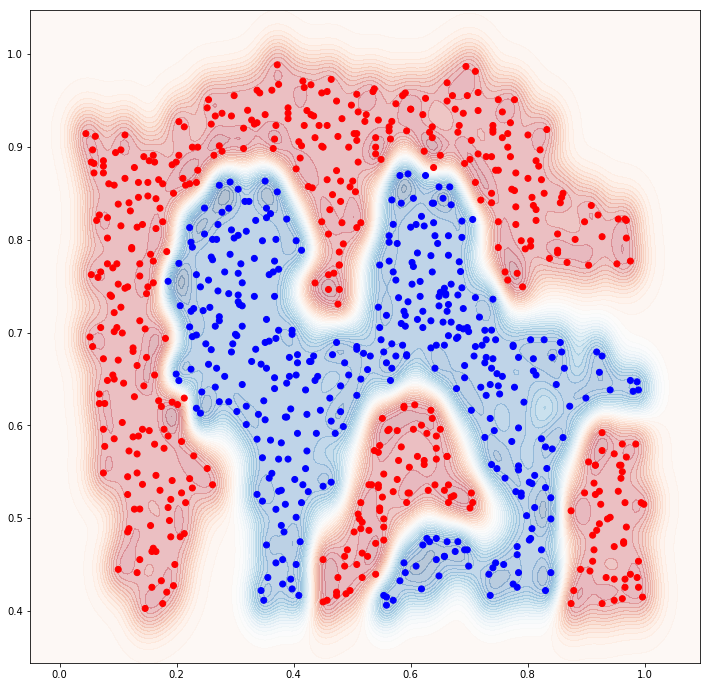

In [26]:
steps = 200
x0 = my_linspace(min(x[:,0]), max(x[:,0]), steps)
x1 = my_linspace(min(x[:,1]), max(x[:,1]), steps)
xx0, xx1 = np.meshgrid(x0, x1)
mesh_data = np.c_[xx0.ravel(), xx1.ravel()]
mesh_deci = clf.decision_function(mesh_data).reshape(steps, steps)

plt.figure(figsize = (12, 12))
plt.contourf(xx0, xx1, -mesh_deci, 40, cmap = plt.cm.RdBu, alpha = 0.3)
plt.scatter(x[:,0], x[:,1], c=y_color)
plt.show()